# Exploratory Data Analysis with IA assistants (Copilot example)

# Introduction

Our goal in this example is to illustrate the use of AI code assistants such as Google's Gemini or GitHub Copilot in any task involving code writing. We will use a data analysis problem as an example, but the same general ideas apply to many other situations.

## Prompt guided analysis

+ The plan is to perform an initial exploration of a given dataset by asking the assistant questions (prompts) that will result in Python code output. When we ran this experiment we did not write a single line of Python code nor did we directly modify the code. When needed, we just asked the AI assistant to rewrite the code for us.

+ We provide below the list of prompts that we used in our experiment with this dataset. We have also included the output we got in another version of this notebook. But keep in mind that (like in the juvenile 80's books *Choose your own adventure*) different iterations of the analysis can lead you to different results. So the prompts below are more of guidelines...

<p align="center">
  <img src="https://dl.dropboxusercontent.com/scl/fi/bpbh13ecw5g7slisux1cb/Choose_Your_own_adventure_in_Data_Science.png?rlkey=gyg6os6kximsmsk0967kbgf26" width="250">
</p>

## Dataset

The dataset we will use is the publicly available Kaggle dataset

[**Brazilian E-Commerce Public Dataset by Olist**](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

Olist is an e-commerce platform from Brazil that connects sellers (often small businesses) with potential buyers across the country. providing the required logistics. The dataset consists of several tables with information about customers, orders, user reviews, products, etc. We have provided you with a link to a zip file containing all these dataset. That zip file is the starting point of the adventure, in which we assume no previous knowledge of Python data structures or libraries, not even the format of those data files!


# Let us begin


To proceed we suggest that you copy the text of the following prompt and click on the link to create code with AI in the next code cell. Then paste the prompt code and hit *Enter*.


## prompt:
I have a zip file at
https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=0
that contains several csv files. I want to download it and decompress it to a subfolder called data. I am running this code in MacOS.


In [5]:
import os
import requests
import zipfile

# Define the URL and local path for the zip file
zip_url = 'https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=1'
zip_path = 'brazilian_e_commerce.zip'

# Download the zip file if it doesn't exist
if not os.path.exists(zip_path):
    response = requests.get(zip_url)
    with open(zip_path, 'wb') as f:
        f.write(response.content)

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Extract the zip file into the 'data' directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

## prompt:

I want to load all these files into python, so that e.g. olist_customers_dataset is stored as customers, and similarly for all data files whose names begin by olist_


In [6]:
import pandas as pd
import os

# Get the list of files in the data directory
data_files = os.listdir('data/')

# Iterate through the files and load the ones starting with 'olist_'
for file_name in data_files:
    if file_name.startswith('olist_') and file_name.endswith('.csv'):
        # Create a variable name based on the file name
        # Remove 'olist_' and '_dataset.csv'
        var_name = file_name.replace('olist_', '').replace('_dataset.csv', '')

        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join('data', file_name))

        # Assign the DataFrame to a variable with the generated name
        globals()[var_name] = df

# Now you can access the dataframes using the generated names, e.g., 'customers', 'sellers', etc.

In [7]:
# prompt: I want to load all these files into python, so that e.g. olist_customers_dataset is stored as customers, and similarly for all data files whose names begin by olist_

import pandas as pd
import os

# Get the list of files in the data directory
data_files = os.listdir('data/')

# Iterate through the files and load the ones starting with 'olist_'
for file_name in data_files:
    if file_name.startswith('olist_') and file_name.endswith('.csv'):
        # Create a variable name based on the file name
        # Remove 'olist_' and '_dataset.csv'
        var_name = file_name.replace('olist_', '').replace('_dataset.csv', '')

        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join('data', file_name))

        # Assign the DataFrame to a variable with the generated name
        globals()[var_name] = df

# You can now access the dataframes using the generated names, e.g., 'customers', 'sellers', etc.
# For example:

# print(customers.head())
# print(sellers.head())


## prompt:

I want to do basic exploratory analysis on the data in the customers dataframe, what should I do next?


In [10]:
# Basic exploratory analysis for the customers dataframe

# Show the first few rows
print("First 5 rows:")
print(customers.head())

# Show summary info
print("\nInfo:")
print(customers.info())

# Show summary statistics for numeric columns
print("\nDescribe (numeric columns):")
print(customers.describe())

# Show summary statistics for object columns
print("\nDescribe (object columns):")
print(customers.describe(include=['object']))

# Check for missing values
print("\nMissing values per column:")
print(customers.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(customers.duplicated().sum())

First 5 rows:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column             

## prompt::

How many unique values per column are there?

In [11]:
# prompt: How many unique values per column are there?

# Check the number of unique values in each column
for col in customers.columns:
    print(f"{col}: {customers[col].nunique()} unique values")

customer_id: 99441 unique values
customer_unique_id: 96096 unique values
customer_zip_code_prefix: 14994 unique values
customer_city: 4119 unique values
customer_state: 27 unique values


## prompt:

Are there duplicated rows?

In [12]:
# prompt: Are there duplicated rows?

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


## Consider other data sets

## prompt:

How do I check all the other datasets at once for missing data and duplicates?


In [13]:
# prompt: How do I check all the other datasets at once for missing data and duplicates?

import pandas as pd
import sys

# Function to check for missing data and duplicates in a DataFrame
def check_data_quality(df, df_name):
    print(f"--- Checking DataFrame: {df_name} ---")
    print("\nMissing values per column:")
    print(df.isnull().sum())
    print("\nNumber of duplicate rows:")
    print(df.duplicated().sum())
    print("-" * (len(df_name) + 23))

# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and check for pandas DataFrames
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with 'olist_' (after removing 'df_')
    # This assumes the convention of naming dataframes after the original file names without 'olist_' and 'dataset'
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        check_data_quality(var_value, var_name)

--- Checking DataFrame: sellers ---

Missing values per column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Number of duplicate rows:
0
------------------------------
--- Checking DataFrame: orders ---

Missing values per column:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Number of duplicate rows:
0
-----------------------------
--- Checking DataFrame: order_items ---

Missing values per column:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Number of duplicate rows:
0
---------------------------

## prompt:

In the products dataframe there are several columns with the same number of missing data. Are these missing data in the same rows of these columns?


In [14]:
# prompt: In the products dataframe there are several columns with the same number of missing data. Are these missing data in the same rows of these columns?

# Find columns in 'products' dataframe with the same number of missing values
missing_counts = products.isnull().sum()
cols_with_same_missing = missing_counts[missing_counts > 0].groupby(missing_counts).groups

# Check if the missing data is in the same rows for columns with the same missing count
for count, cols in cols_with_same_missing.items():
    if len(cols) > 1:
        print(f"\nChecking columns with {count} missing values: {list(cols)}")
        # Create a boolean mask for missing values in each column
        missing_masks = {col: products[col].isnull() for col in cols}

        # Check if the missing masks are identical
        is_same_rows = all(missing_masks[cols[0]].equals(missing_masks[col]) for col in cols[1:])

        if is_same_rows:
            print("  Missing data is in the same rows for these columns.")
        else:
            print("  Missing data is NOT in the same rows for these columns.")
    elif len(cols) == 1 and count > 0:
         print(f"\nColumn '{cols[0]}' has {count} missing values.")


Checking columns with 2 missing values: ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
  Missing data is in the same rows for these columns.

Checking columns with 610 missing values: ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
  Missing data is in the same rows for these columns.


## prompt:

In the orders dataFrame, I have missing values. It looks like the number of missing values in some columns is correlated. How can I check if the missing values form a pattern and visualize it?



Missing value matrix for 'orders' dataframe:


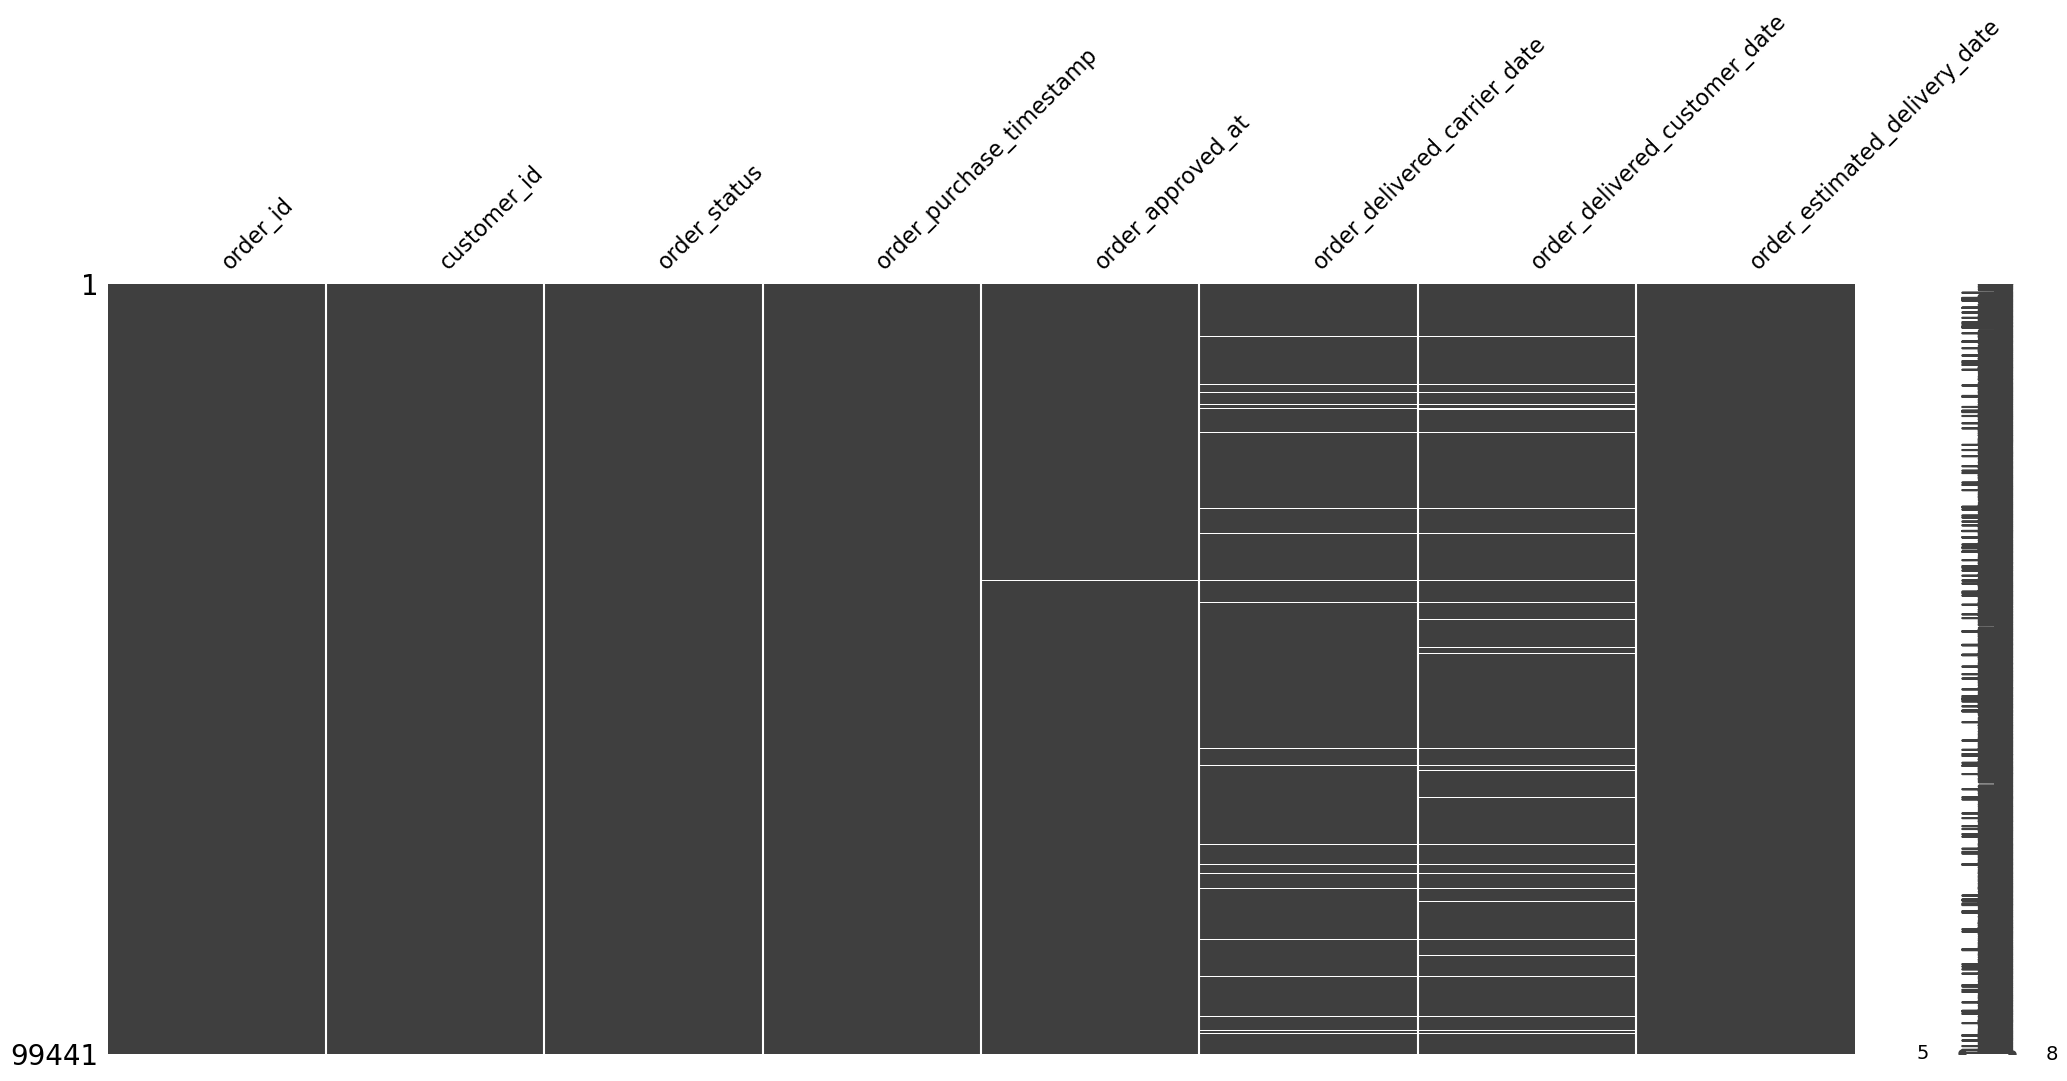


Missing value bar plot for 'orders' dataframe:


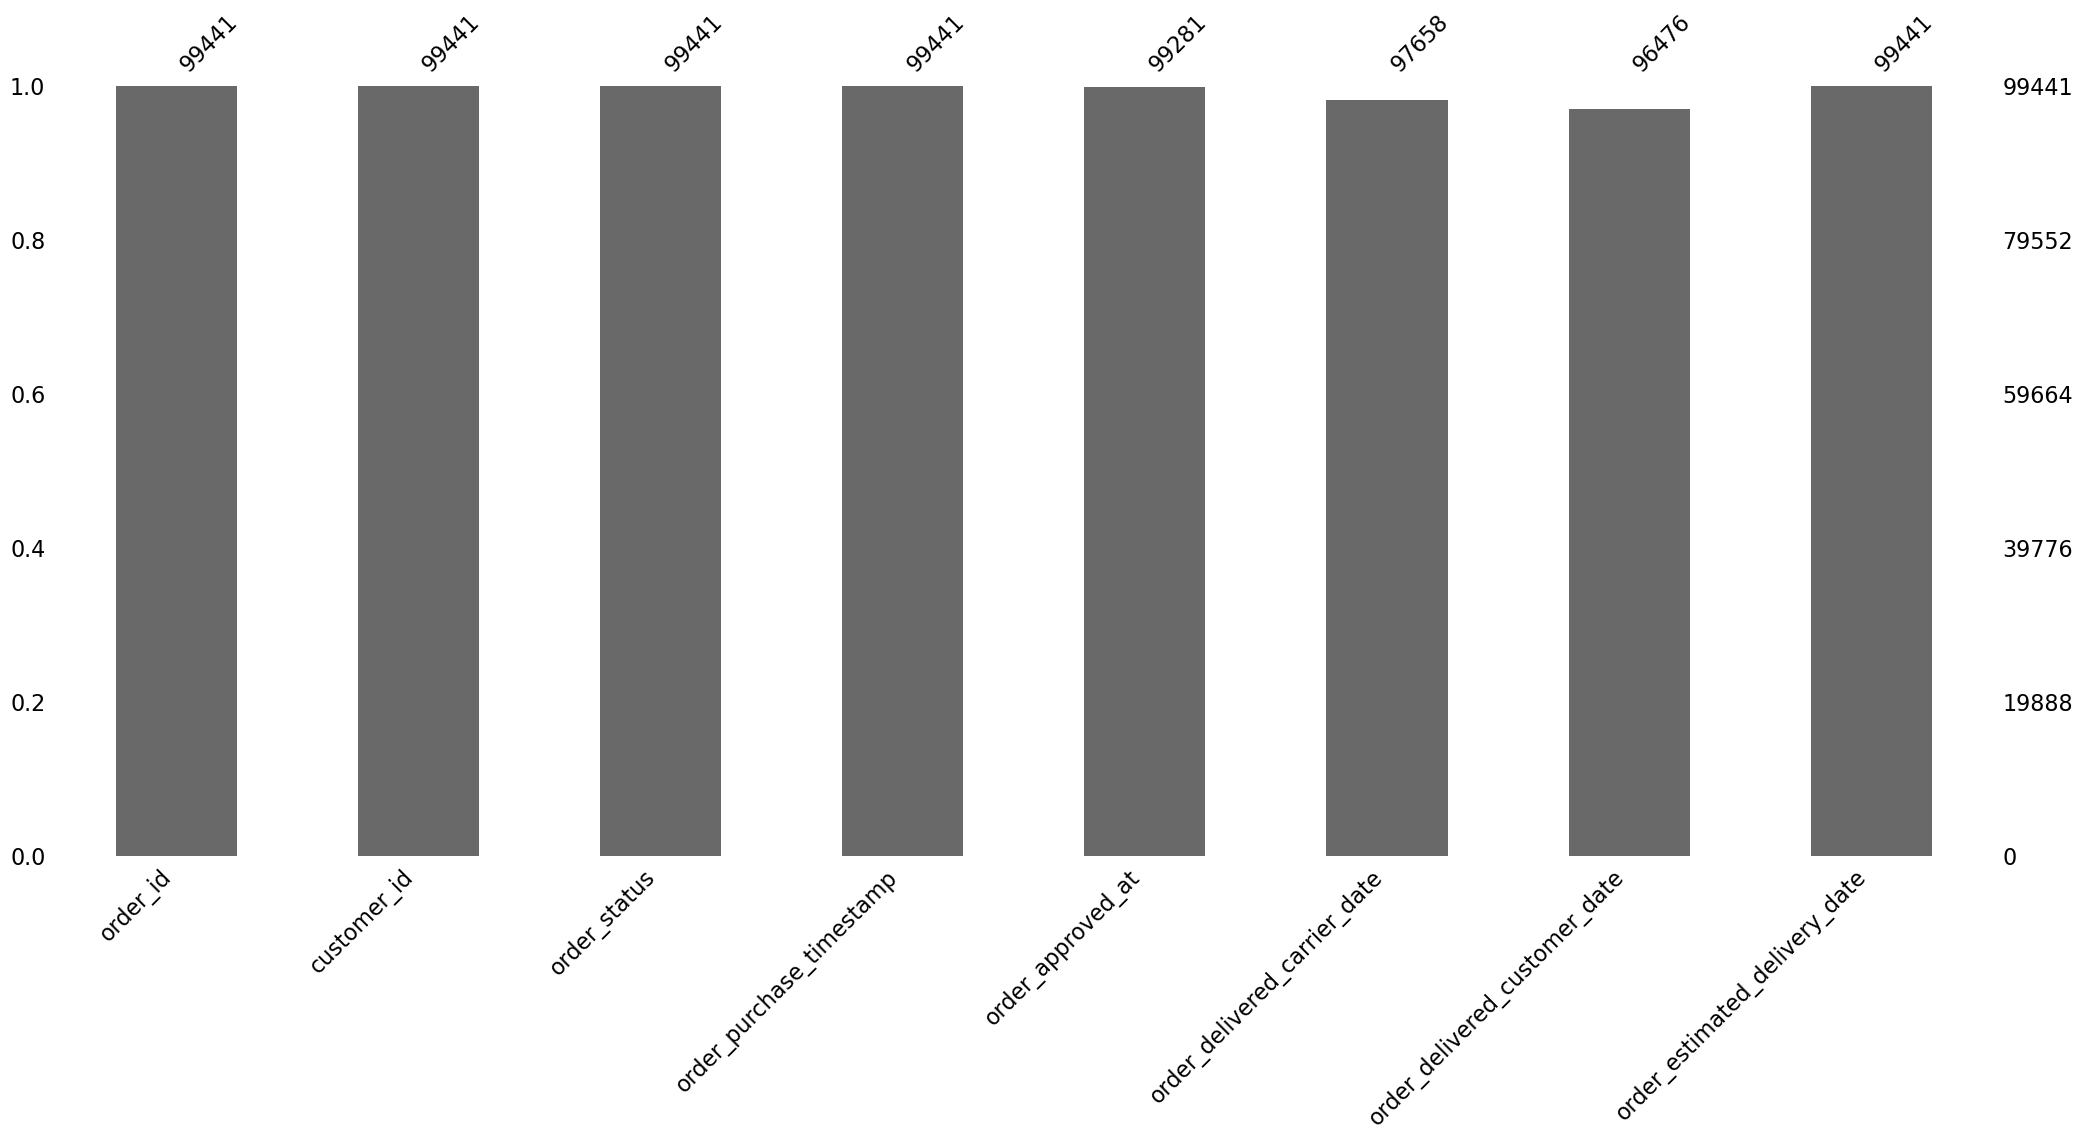


Missing value correlation heatmap for 'orders' dataframe:


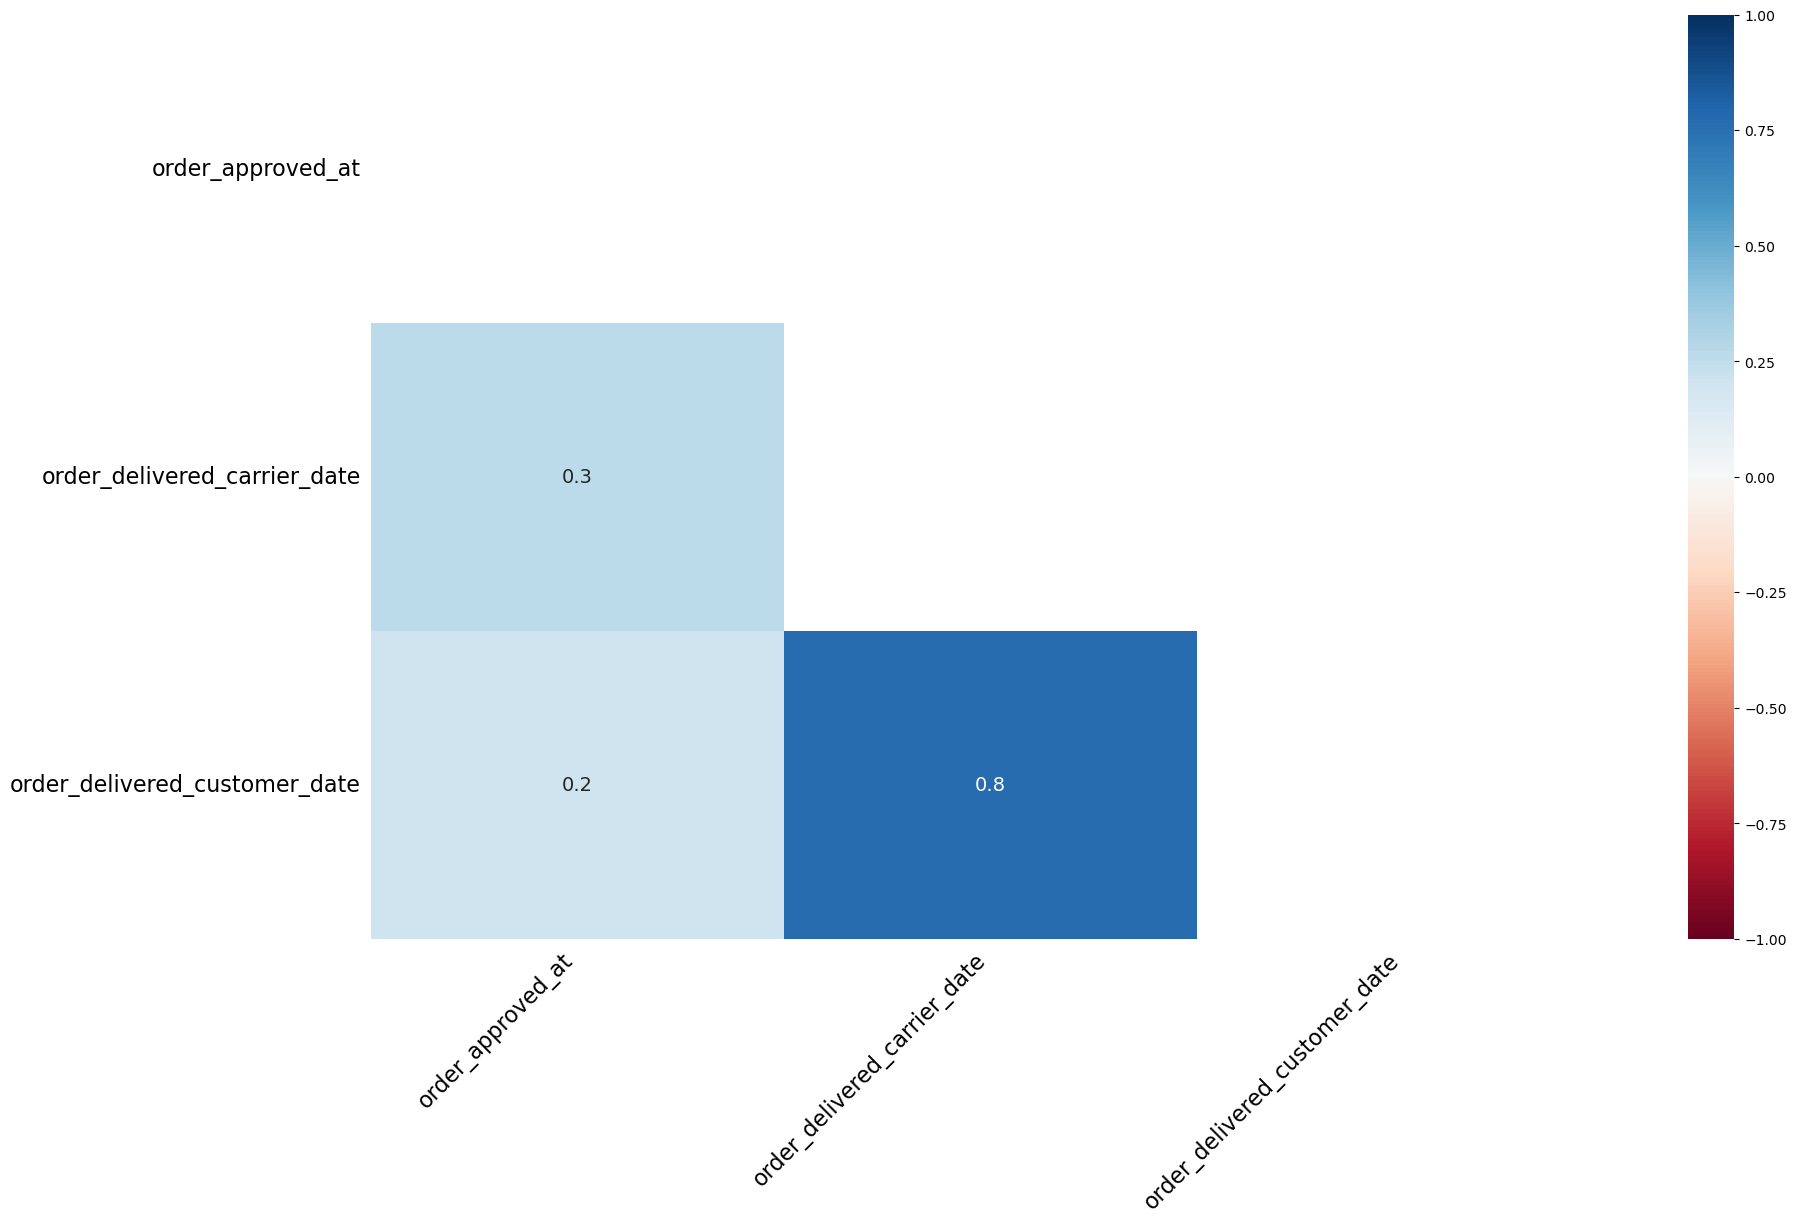


Missing value dendrogram for 'orders' dataframe:


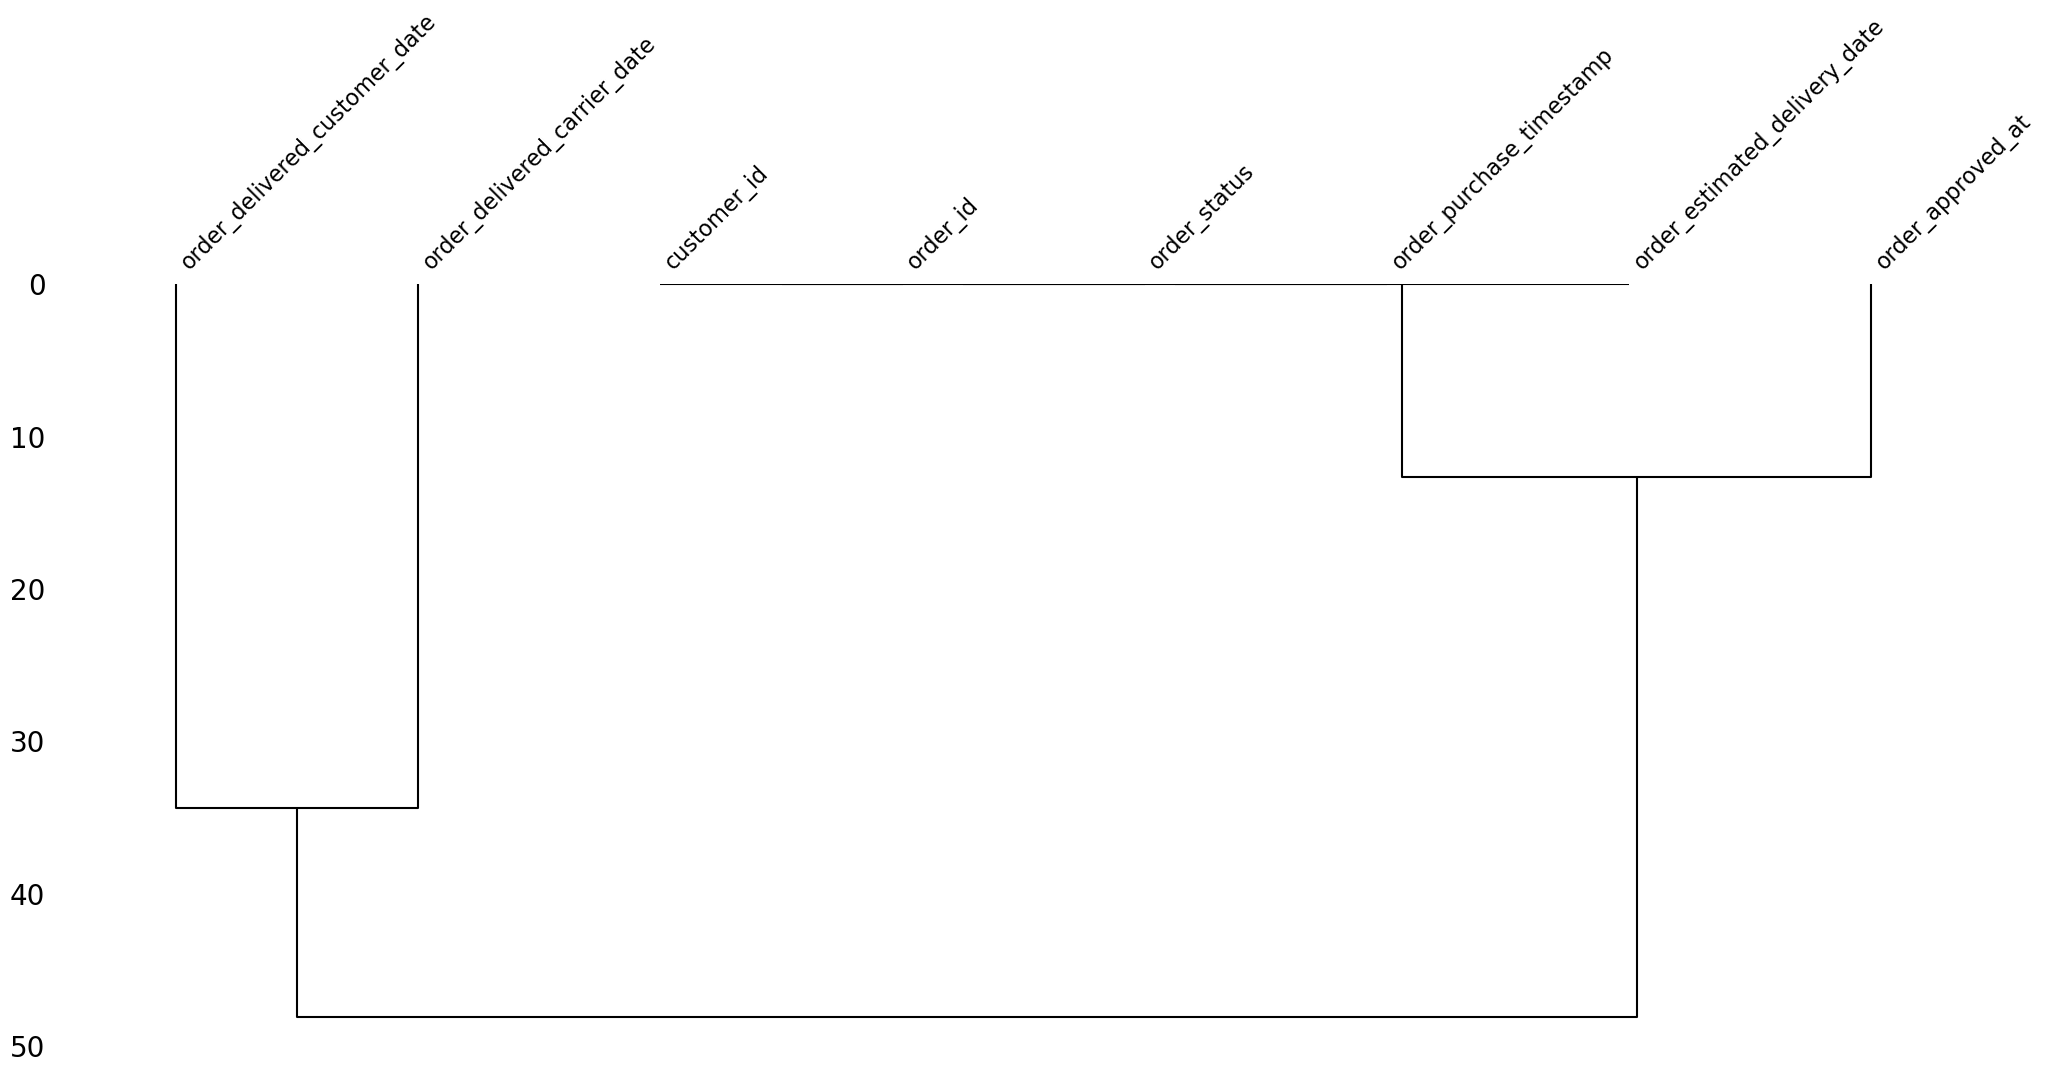

In [15]:
# prompt: In the orders dataFrame, I have missing values. It looks like the number of missing values in some columns is correlated. How can I check if the missing values form a pattern and visualize it?

!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the orders dataframe
print("\nMissing value matrix for 'orders' dataframe:")
msno.matrix(orders)
plt.show()

print("\nMissing value bar plot for 'orders' dataframe:")
msno.bar(orders)
plt.show()

# Check the correlation of missing values between columns
print("\nMissing value correlation heatmap for 'orders' dataframe:")
msno.heatmap(orders)
plt.show()

print("\nMissing value dendrogram for 'orders' dataframe:")
msno.dendrogram(orders)
plt.show()

## prompt:

 Can I do the same check for the missing values pattern and visualize it, this time in the products dataset?


Missing value matrix for 'products' dataframe:


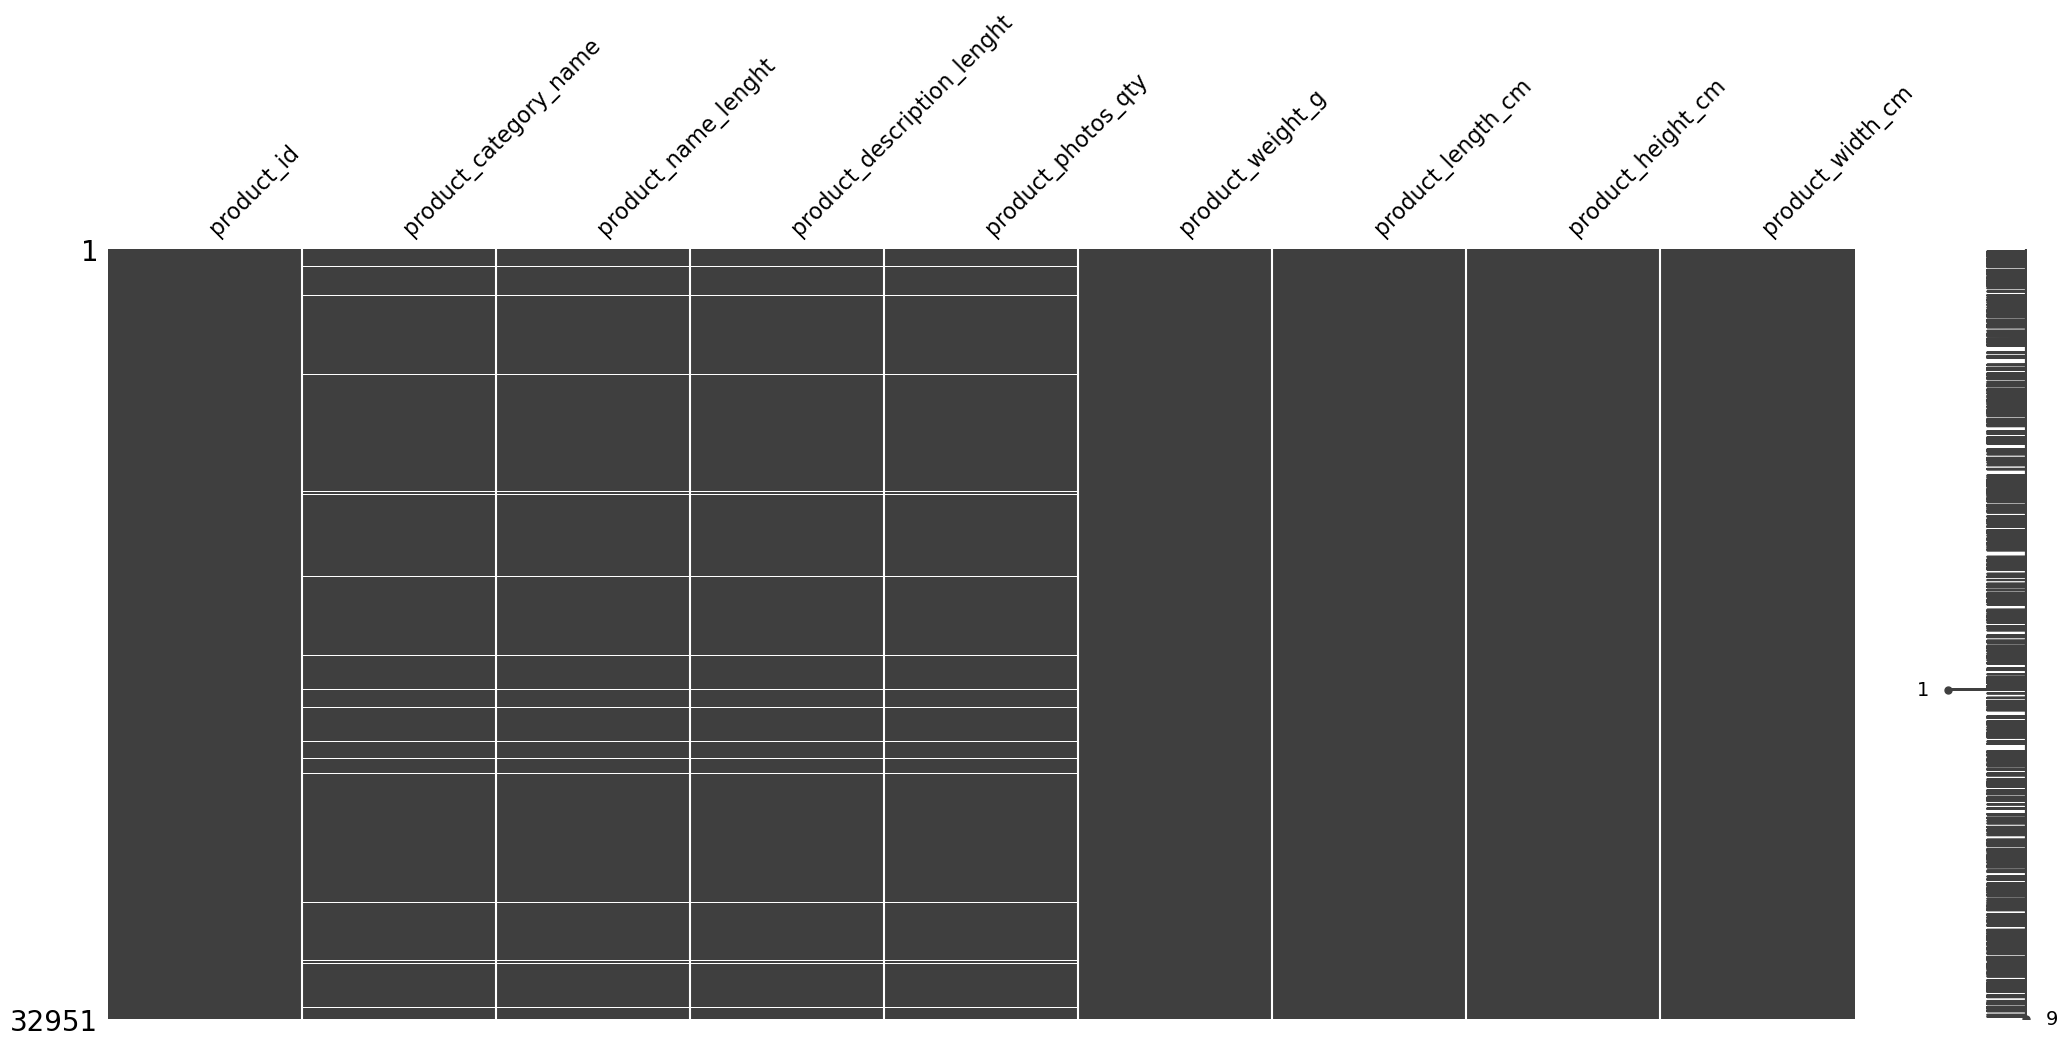


Missing value bar plot for 'products' dataframe:


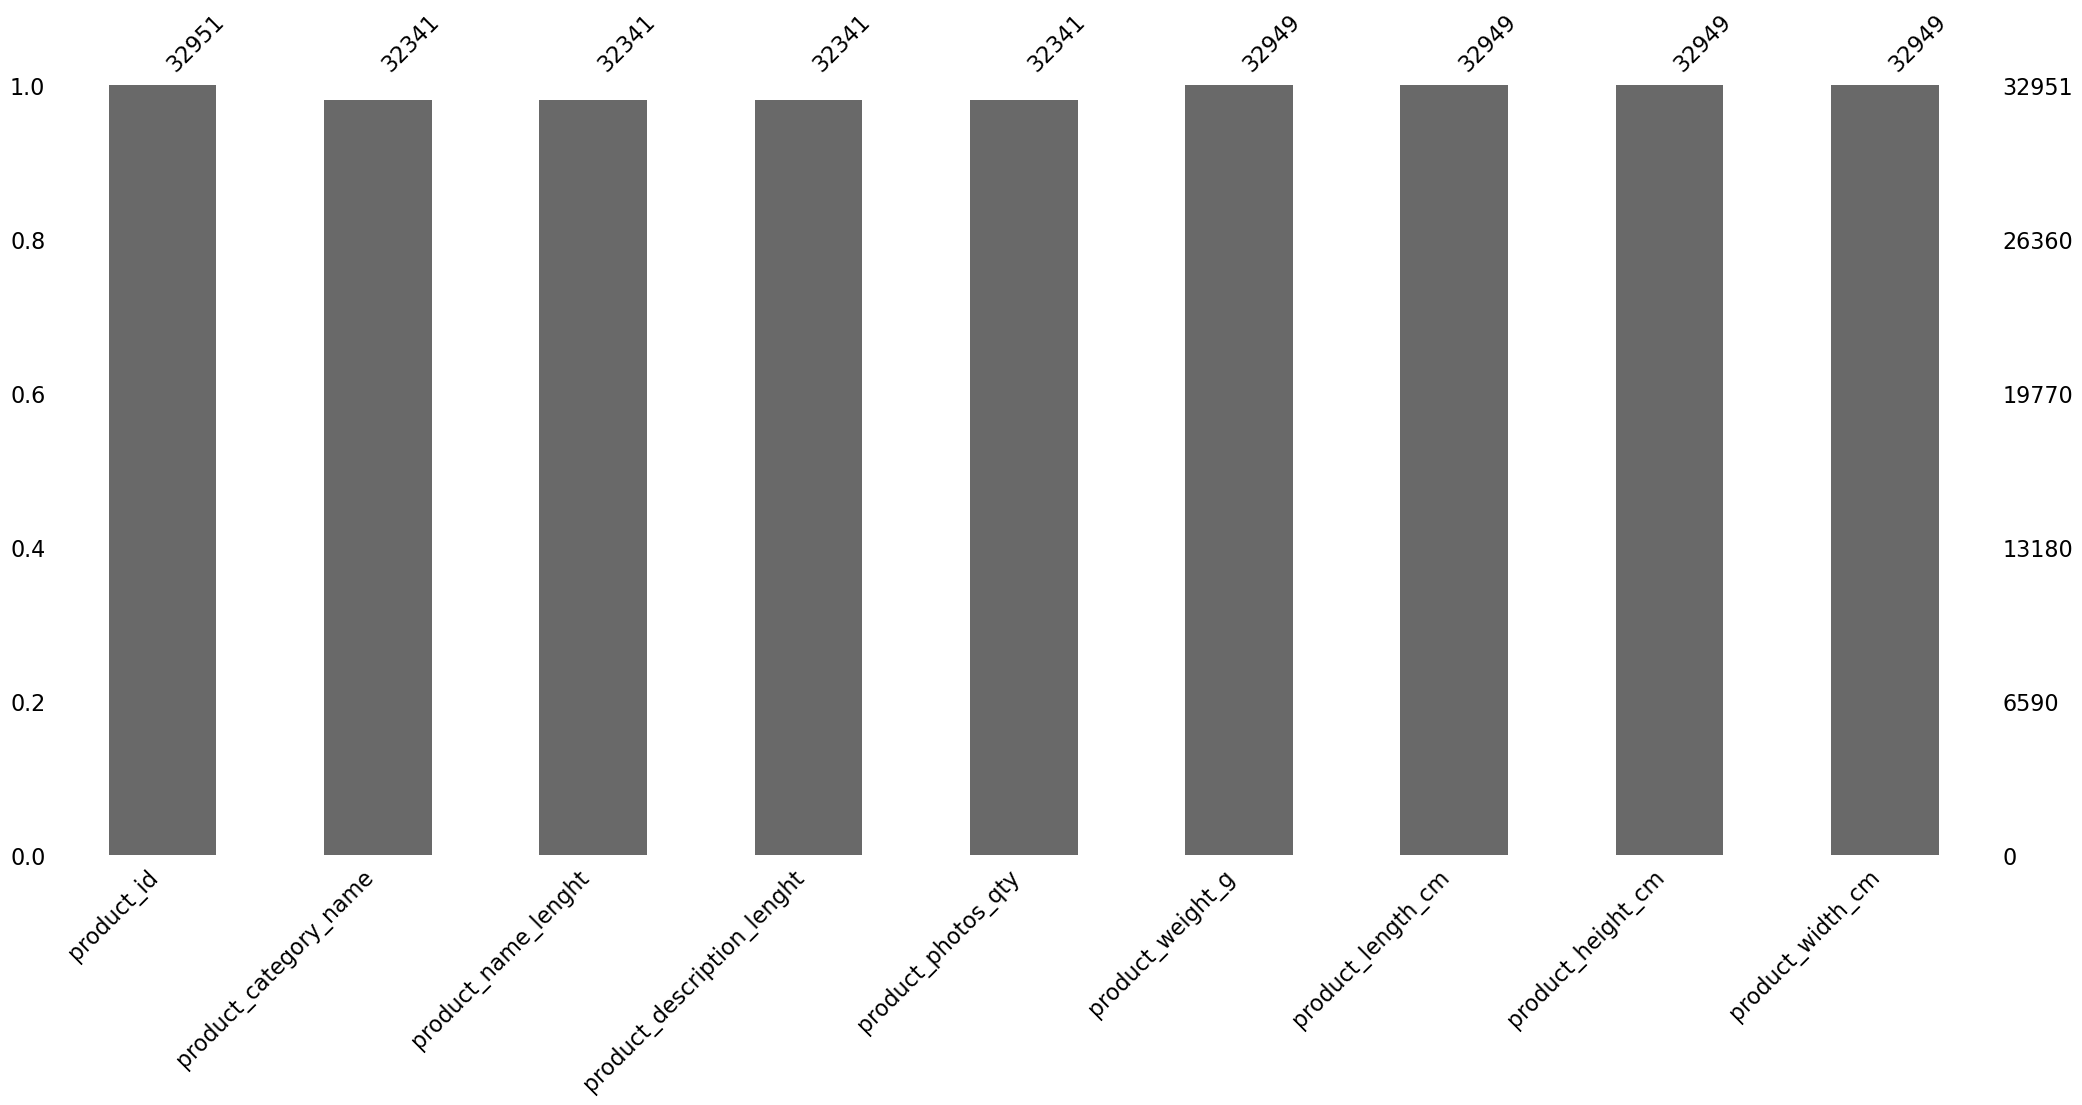


Missing value correlation heatmap for 'products' dataframe:


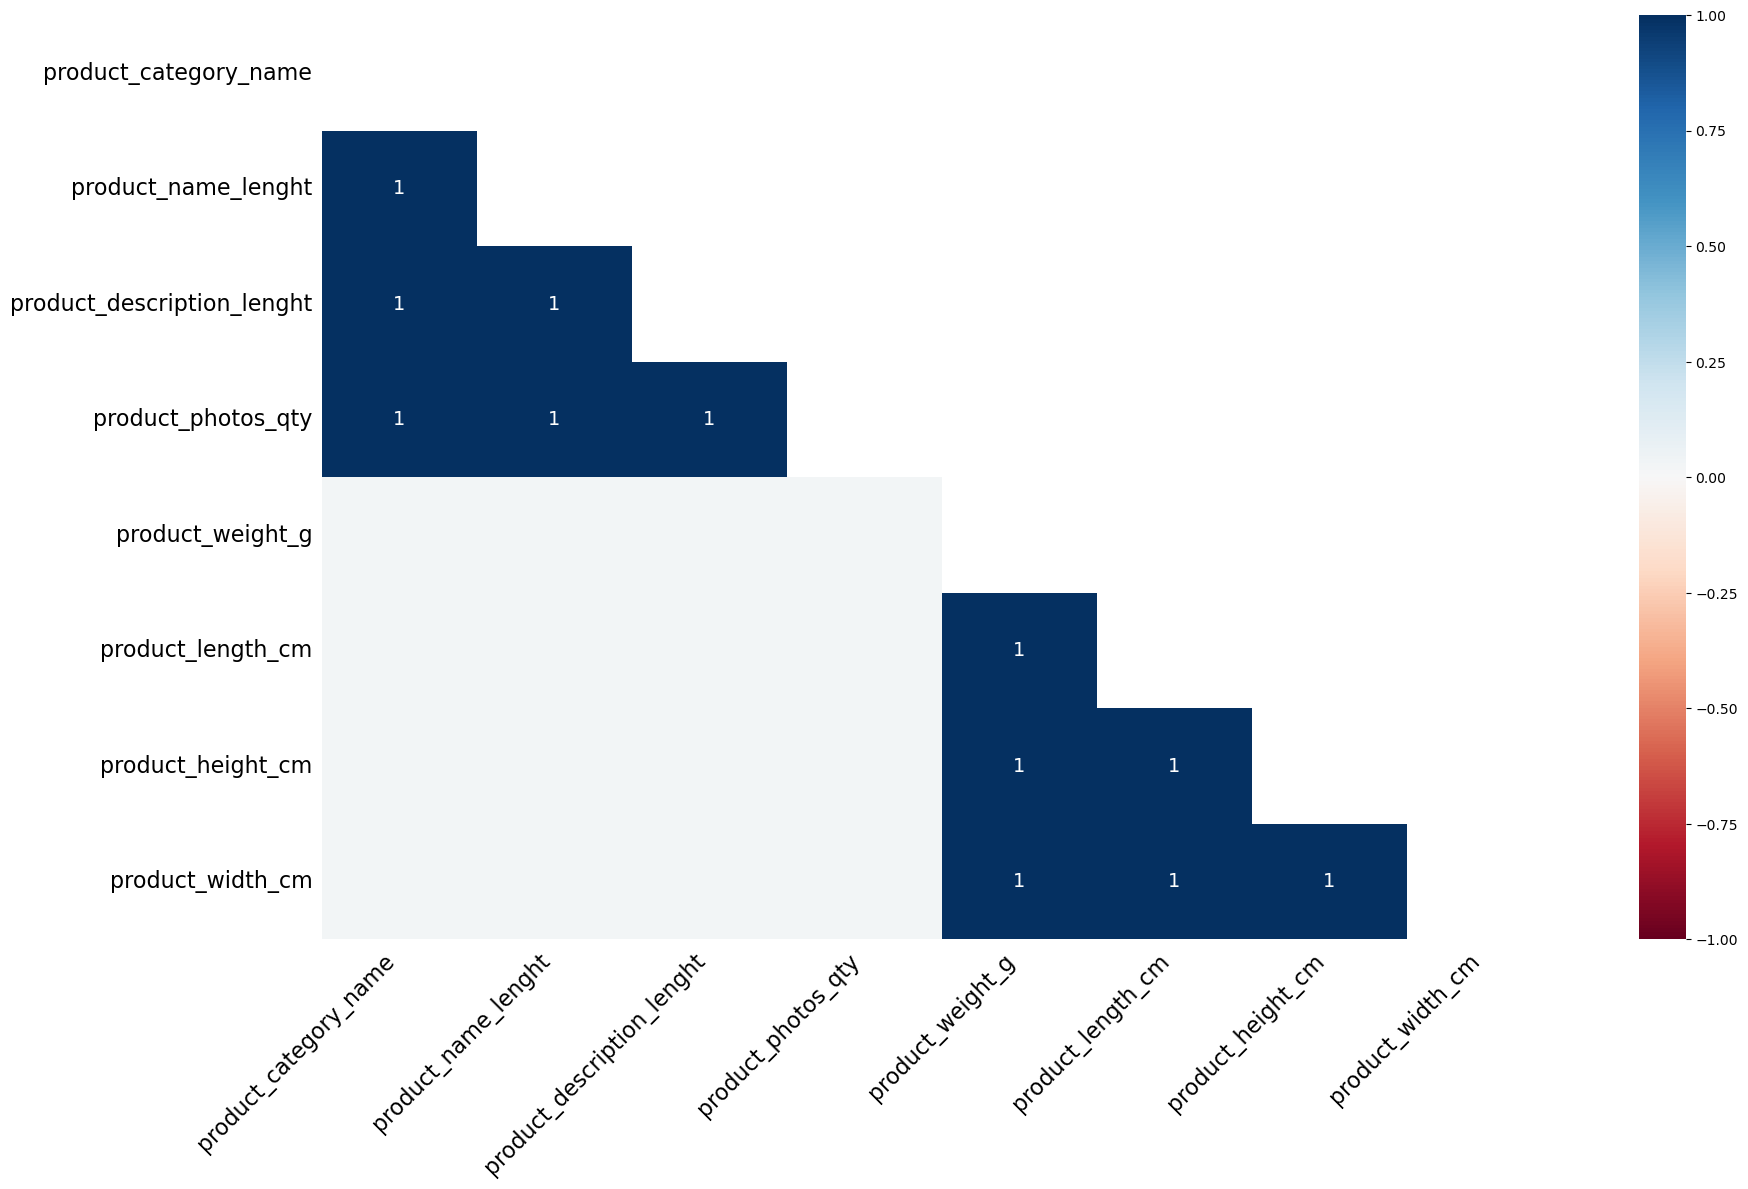


Missing value dendrogram for 'products' dataframe:


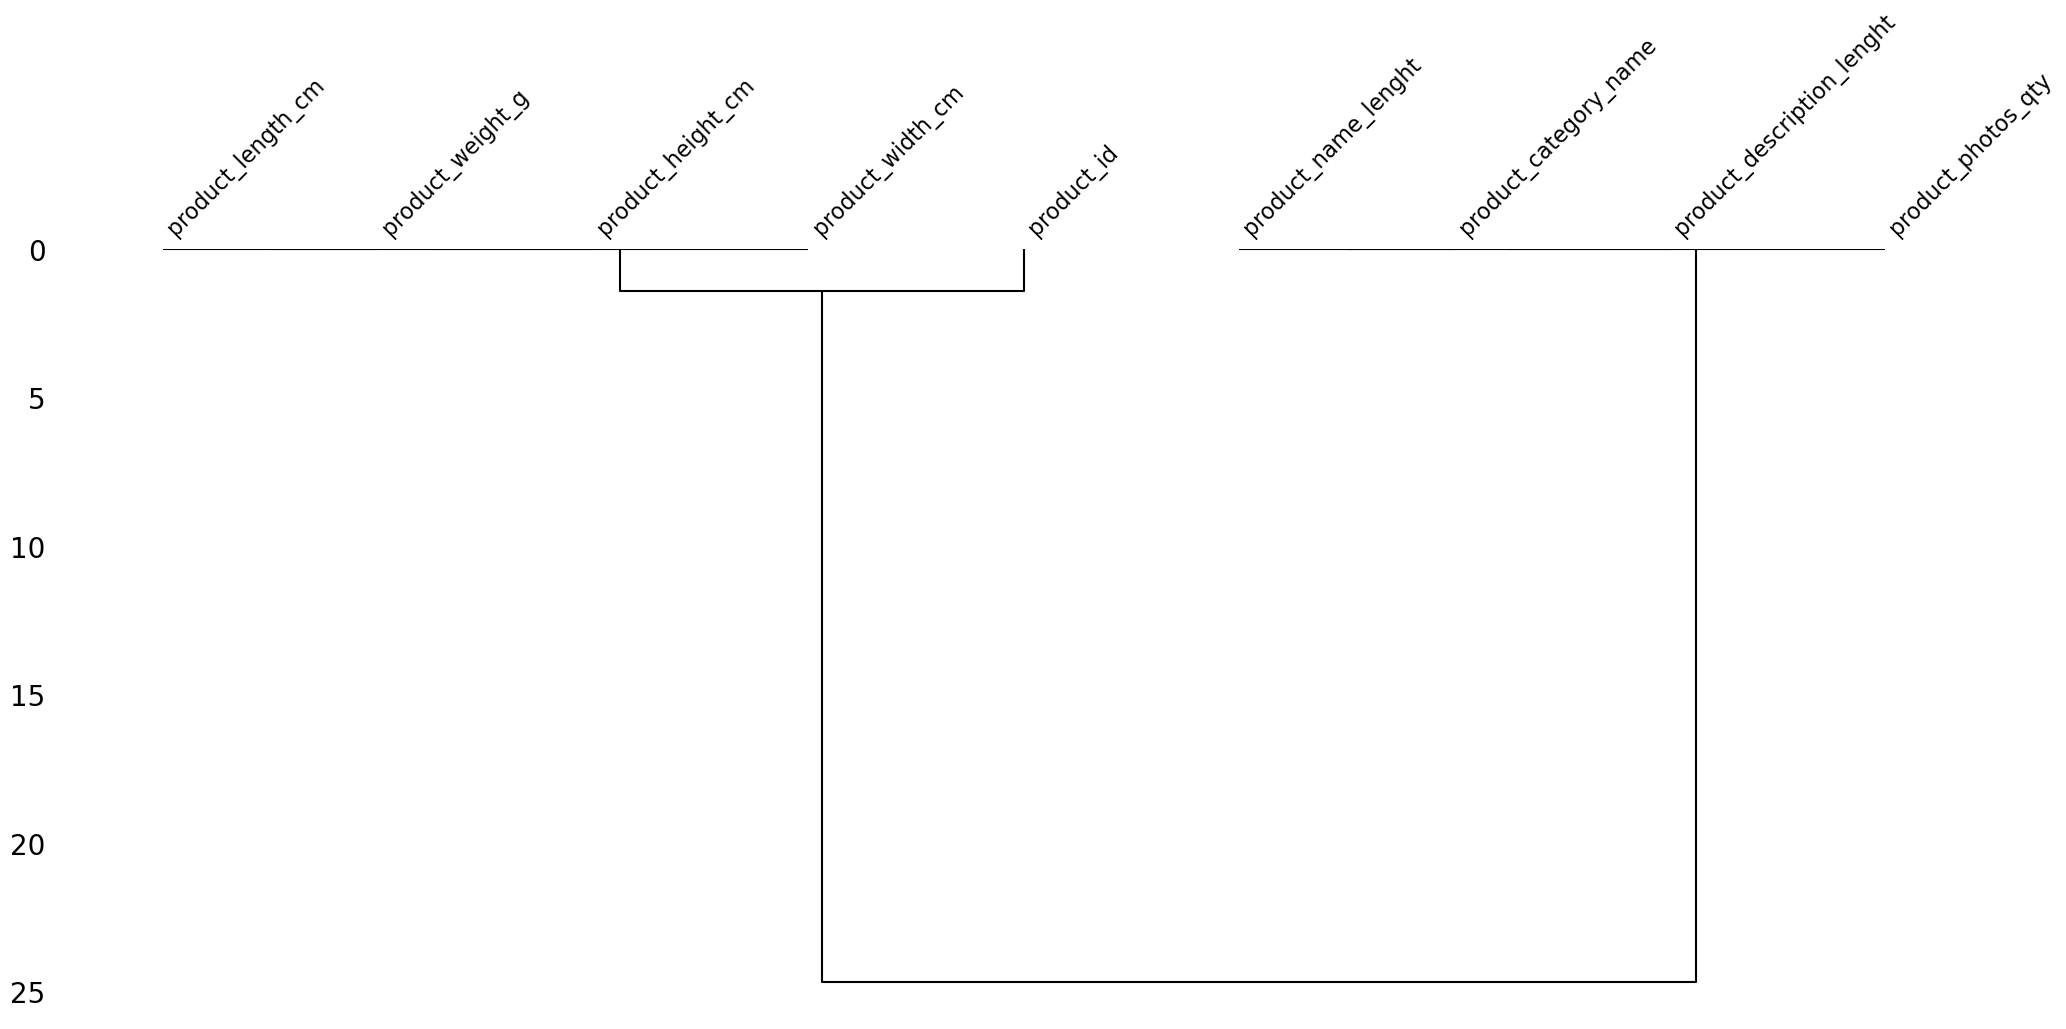

In [16]:
# prompt: Can I do the same check for the missing values pattern and visualize it, this time in the products dataset?

import matplotlib.pyplot as plt
# Visualize missing values in the products dataframe
print("\nMissing value matrix for 'products' dataframe:")
msno.matrix(products)
plt.show()

print("\nMissing value bar plot for 'products' dataframe:")
msno.bar(products)
plt.show()

# Check the correlation of missing values between columns
print("\nMissing value correlation heatmap for 'products' dataframe:")
msno.heatmap(products)
plt.show()

print("\nMissing value dendrogram for 'products' dataframe:")
msno.dendrogram(products)
plt.show()

## prompt:

Does any of the dataframes contain date or time information?

In [17]:
# prompt: Does any of the dataframes contain date or time information?

import pandas as pd
# Function to check if a DataFrame contains columns with date or time information
def contains_datetime(df, df_name):
    datetime_cols = []
    for col in df.columns:
        # Attempt to convert the column to datetime
        try:
            pd.to_datetime(df[col], errors='raise')
            datetime_cols.append(col)
        except (ValueError, TypeError):
            pass # Not a datetime column

    if datetime_cols:
        print(f"DataFrame '{df_name}' contains potential datetime columns: {datetime_cols}")
        return True
    else:
        print(f"DataFrame '{df_name}' does not appear to contain datetime columns.")
        return False

# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and check for pandas DataFrames
found_datetime_df = False
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with 'olist_' (after removing 'df_')
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        if contains_datetime(var_value, var_name):
            found_datetime_df = True

if not found_datetime_df:
    print("\nNo DataFrame found in the current scope appears to contain date or time information.")


/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/14265173

DataFrame 'sellers' contains potential datetime columns: ['seller_zip_code_prefix']
DataFrame 'orders' contains potential datetime columns: ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
DataFrame 'order_items' contains potential datetime columns: ['order_item_id', 'shipping_limit_date', 'price', 'freight_value']
DataFrame 'customers' contains potential datetime columns: ['customer_zip_code_prefix']
DataFrame 'geolocation' contains potential datetime columns: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
DataFrame 'order_payments' contains potential datetime columns: ['payment_sequential', 'payment_installments', 'payment_value']
DataFrame 'order_reviews' contains potential datetime columns: ['review_score', 'review_creation_date', 'review_answer_timestamp']
DataFrame 'products' contains potential datetime columns: ['product_name_lenght', 'product_description_len

/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_70879/14265173

## prompt: Can I get all the column names for the datasets?

In [18]:
# prompt: Can I get all the column names for the datasets?

import pandas as pd
# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and print column names for pandas DataFrames
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with one of the expected names
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        print(f"\nColumns for DataFrame '{var_name}':")
        print(var_value.columns.tolist())


Columns for DataFrame 'sellers':
['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

Columns for DataFrame 'orders':
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Columns for DataFrame 'order_items':
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Columns for DataFrame 'customers':
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Columns for DataFrame 'geolocation':
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Columns for DataFrame 'order_payments':
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Columns for DataFrame 'order_reviews':
['review_id', 'order_id', 'review_score', 'review_comment_title', 'r

## prompt:

My next goal is to assign a customer_unique__id value with each review_id. The order_reviews dataset has a column called order_id, which I would like to use to connect it to the column with the same name in the orders dataset. Then the customer_id column in orders should be connected with the namesake column in customers.


In [19]:
# Merge order_reviews with orders on 'order_id' to get 'customer_id'
reviews_with_customer = order_reviews.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')

# Merge the result with customers on 'customer_id' to get 'customer_unique_id'
reviews_with_customer = reviews_with_customer.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Now each review_id is associated with a customer_unique_id
print(reviews_with_customer[['review_id', 'customer_unique_id']].head())

                          review_id                customer_unique_id
0  7bc2406110b926393aa56f80a40eba40  68a5590b9926689be4e10f4ae2db21a8
1  80e641a11e56f04c1ad469d5645fdfde  64190b91b656ab8f37eb89b93dc84584
2  228ce5500dc1d8e020d8d1322874b6f0  1d47144362c14e94ccdd213e8ec277d5
3  e64fb393e7b32834bb789ff8bb30750e  c8cf6cb6b838dc7a33ed199b825e8616
4  f7c4243c7fe1938f181bec41a392bdeb  d16000272660a1fef81482ad75ba572a


## prompt:

Is there any review_id associated with more than one user_unique_id? Is there any review_id associated with no user_unique_id?


In [20]:
# Check if any review_id is associated with more than one customer_unique_id
review_id_counts = reviews_with_customer.groupby('review_id')['customer_unique_id'].nunique()
multiple_users = review_id_counts[review_id_counts > 1]

if not multiple_users.empty:
    print("review_id(s) associated with more than one customer_unique_id:")
    print(multiple_users)
else:
    print("No review_id is associated with more than one customer_unique_id.")

# Check if any review_id is associated with no customer_unique_id (i.e., missing)
missing_user = reviews_with_customer['customer_unique_id'].isnull()
if missing_user.any():
    print("\nreview_id(s) associated with no customer_unique_id:")
    print(reviews_with_customer.loc[missing_user, 'review_id'])
else:
    print("\nAll review_id values are associated with a customer_unique_id.")

No review_id is associated with more than one customer_unique_id.

All review_id values are associated with a customer_unique_id.


## prompt:

What are the columns of the resulting dataset?


In [21]:
# Display the columns of the reviews_with_customer dataset
print(reviews_with_customer.columns.tolist())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'customer_unique_id']


## prompt:

Can we repeat the merge but this time keeping all the columns in the orders dataset?

In [22]:
# Merge order_reviews with orders on 'order_id', keeping all columns from orders
reviews_with_customer_full = order_reviews.merge(orders, on='order_id', how='left')

# Merge the result with customers on 'customer_id' to get 'customer_unique_id'
reviews_with_customer_full = reviews_with_customer_full.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Display the columns of the new merged dataset
print(reviews_with_customer_full.columns.tolist())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id']


## prompt:

Ok, next I would like to bring in the payment_value  information from order_payments


In [23]:
# Merge reviews_with_customer_full with order_payments to bring in payment_value
# If there are multiple payments per order, aggregate the total payment_value per order_id
order_payments_sum = order_payments.groupby('order_id', as_index=False)['payment_value'].sum()

# Merge on 'order_id'
reviews_with_customer_full = reviews_with_customer_full.merge(order_payments_sum, on='order_id', how='left')

# Display the columns to confirm payment_value is included
print(reviews_with_customer_full.columns.tolist())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'payment_value']


# prompt:

Can I get information about the order_purchase_timestamp variable in this dataset?


In [24]:
# Get info about the 'order_purchase_timestamp' variable in reviews_with_customer_full

col = 'order_purchase_timestamp'
print(f"Column: {col}")
print(f"Dtype: {reviews_with_customer_full[col].dtype}")
print(f"Number of missing values: {reviews_with_customer_full[col].isnull().sum()}")
print(f"Example values:\n{reviews_with_customer_full[col].head()}")

# Check if it can be converted to datetime and show min/max if so
try:
    order_purchase_dt = pd.to_datetime(reviews_with_customer_full[col])
    print(f"\nConverted to datetime. Range: {order_purchase_dt.min()} to {order_purchase_dt.max()}")
except Exception as e:
    print(f"\nCould not convert to datetime: {e}")

Column: order_purchase_timestamp
Dtype: object
Number of missing values: 0
Example values:
0    2018-01-11 15:30:49
1    2018-02-28 12:25:19
2    2018-02-03 09:56:22
3    2017-04-09 17:41:13
4    2018-02-10 10:59:03
Name: order_purchase_timestamp, dtype: object

Converted to datetime. Range: 2016-09-04 21:15:19 to 2018-10-17 17:30:18


# prompt:

Can we convert that variable in the original dataset to a proper date and time type of variable?


In [25]:
# Convert 'order_purchase_timestamp' in the original orders dataframe to datetime type
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Check the result
print(orders['order_purchase_timestamp'].dtype)
print(orders['order_purchase_timestamp'].head())

datetime64[ns]
0   2017-10-02 10:56:33
1   2018-07-24 20:41:37
2   2018-08-08 08:38:49
3   2017-11-18 19:28:06
4   2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: datetime64[ns]


## prompt:

How many weeks does the order_purchase_timestamp span?

In [27]:
# Calculate the number of weeks spanned by the order_purchase_timestamp in the orders dataframe
min_date = orders['order_purchase_timestamp'].min()
max_date = orders['order_purchase_timestamp'].max()
n_weeks = ((max_date - min_date).days // 7) + 1

print(f"The order_purchase_timestamp spans from {min_date.date()} to {max_date.date()}, covering {n_weeks} weeks.")

The order_purchase_timestamp spans from 2016-09-04 to 2018-10-17, covering 111 weeks.


## prompt:

Can we see a time series plot of the aggregated total value of payment_value per week?


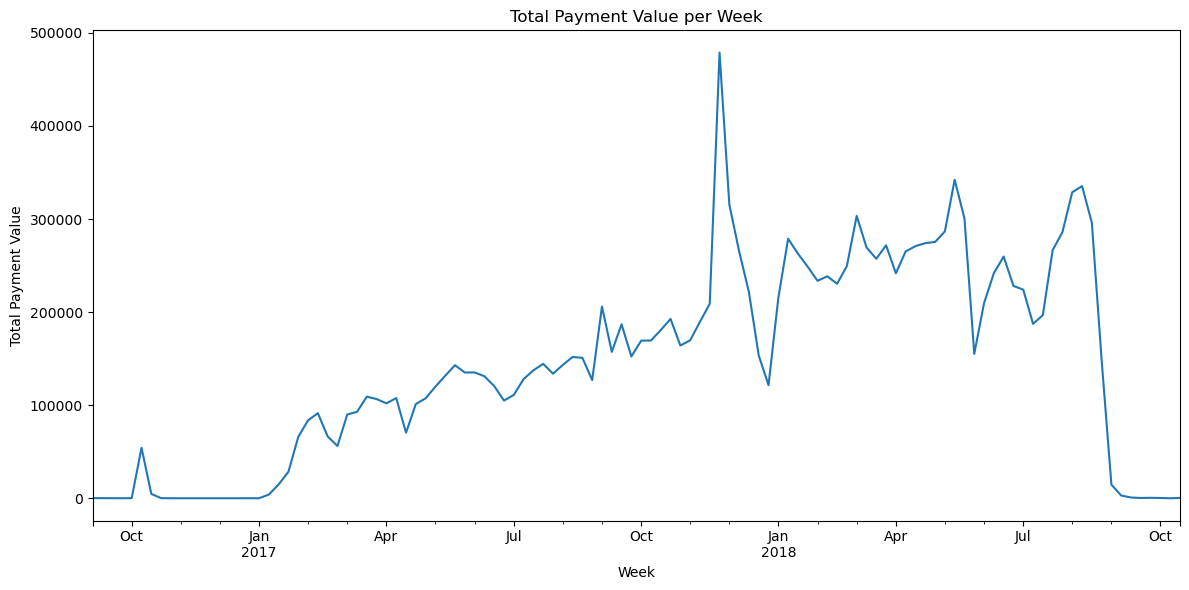

In [28]:
import matplotlib.pyplot as plt

# Ensure order_purchase_timestamp is datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Merge orders with order_payments_sum to get payment_value for each order
orders_with_payment = orders.merge(order_payments_sum, on='order_id', how='left')

# Set order_purchase_timestamp as index
orders_with_payment = orders_with_payment.set_index('order_purchase_timestamp')

# Resample by week and sum payment_value
weekly_payments = orders_with_payment['payment_value'].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
weekly_payments.plot()
plt.title('Total Payment Value per Week')
plt.xlabel('Week')
plt.ylabel('Total Payment Value')
plt.tight_layout()
plt.show()

## prompt:

How could I detect seasonality in the daily series?


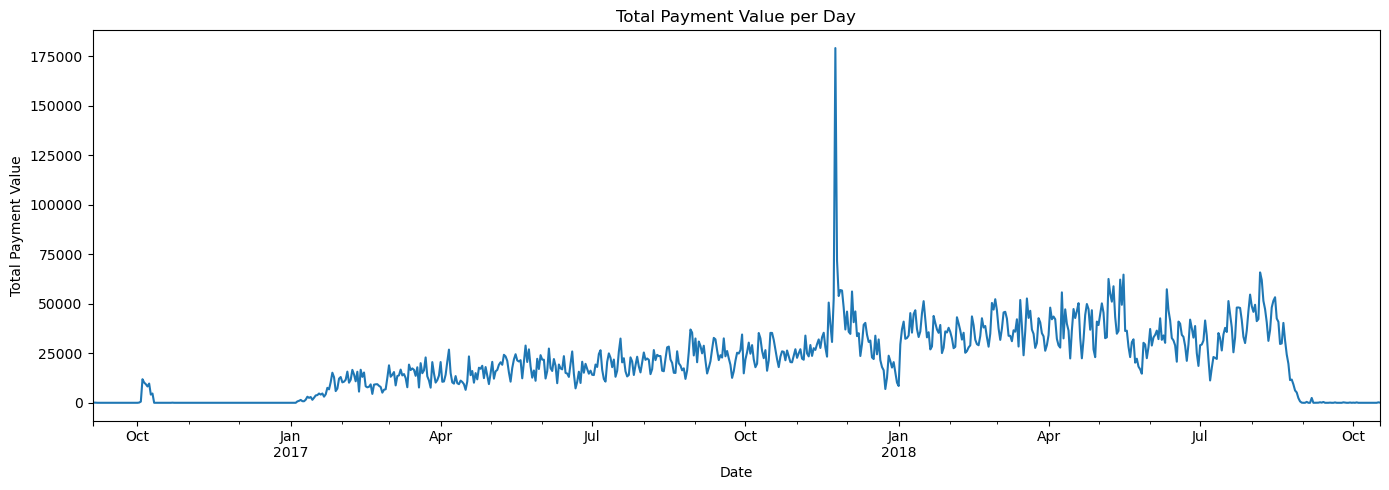

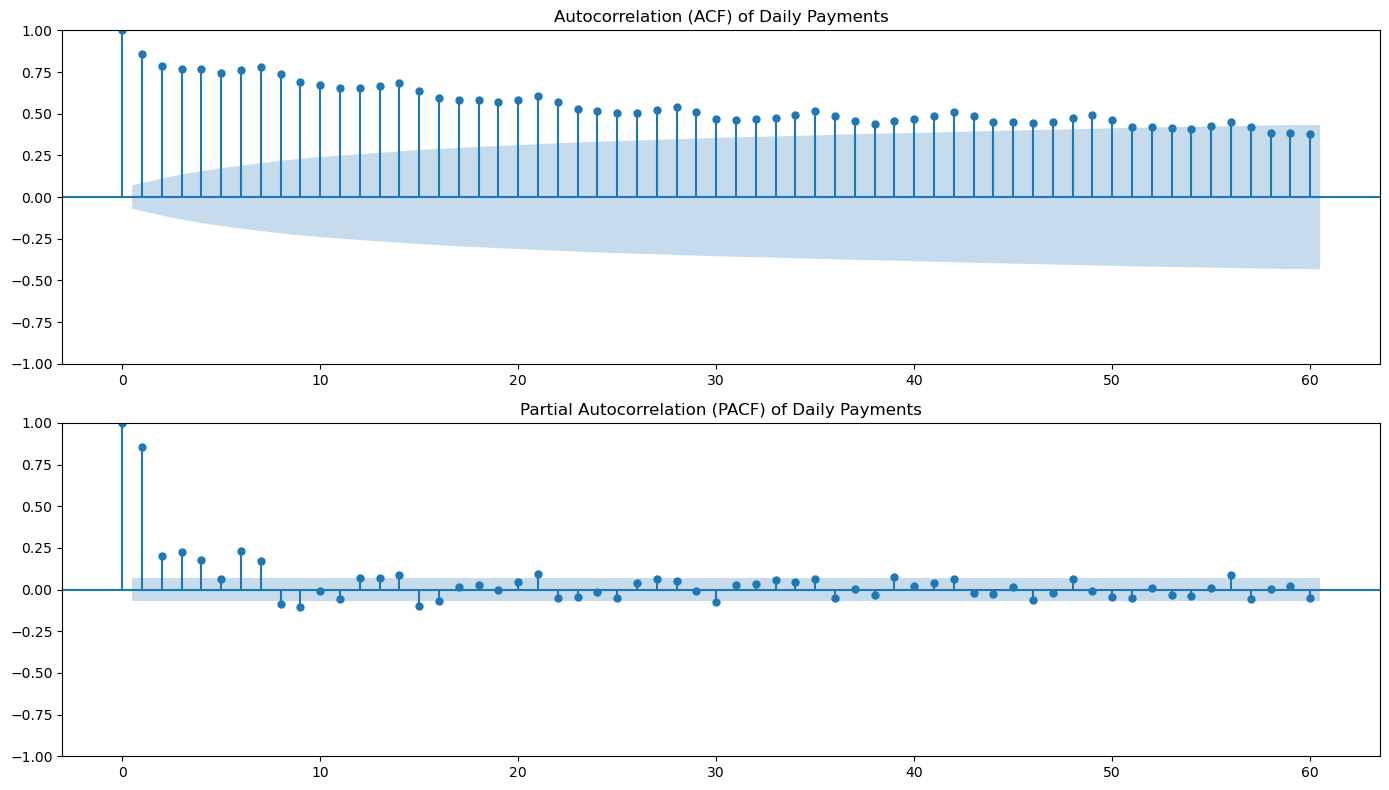

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

# Resample to daily total payment value
daily_payments = orders_with_payment['payment_value'].resample('D').sum()

# Plot the daily series
plt.figure(figsize=(14, 5))
daily_payments.plot()
plt.title('Total Payment Value per Day')
plt.xlabel('Date')
plt.ylabel('Total Payment Value')
plt.tight_layout()
plt.show()

# Plot ACF and PACF to detect seasonality
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(daily_payments.fillna(0), lags=60, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF) of Daily Payments')
plot_pacf(daily_payments.fillna(0), lags=60, ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF) of Daily Payments')
plt.tight_layout()
plt.show()

# Using the chat interface

**User:**

In the last plot, of the ACF function, is there any hint of seasonality? Which frequency?

In [30]:
# Analyze the ACF plot for seasonality patterns
import numpy as np

# Look at the ACF values at specific lags to identify seasonality
print("ACF Analysis for Seasonality Detection:")
print("=" * 50)

# Check for weekly seasonality (lag 7, 14, 21, etc.)
weekly_lags = [7, 14, 21, 28]
print("\nWeekly Seasonality Check (lags 7, 14, 21, 28):")
for lag in weekly_lags:
    if lag < len(daily_payments):
        correlation = daily_payments.fillna(0).autocorr(lag=lag)
        print(f"Lag {lag} (week {lag//7}): ACF = {correlation:.3f}")

# Check for monthly seasonality (lag 30, 60)
monthly_lags = [30, 60]
print("\nMonthly Seasonality Check (lags 30, 60):")
for lag in monthly_lags:
    if lag < len(daily_payments):
        correlation = daily_payments.fillna(0).autocorr(lag=lag)
        print(f"Lag {lag}: ACF = {correlation:.3f}")

print("\nInterpretation:")
print("- If ACF values at lags 7, 14, 21, 28 are significantly positive, this suggests weekly seasonality")
print("- The strongest pattern would typically be at lag 7 (one week)")
print("- Values above 0.1-0.2 are generally considered significant for seasonality detection")
print("- In e-commerce data, weekly patterns are common due to different shopping behaviors on weekdays vs weekends")

ACF Analysis for Seasonality Detection:

Weekly Seasonality Check (lags 7, 14, 21, 28):
Lag 7 (week 1): ACF = 0.793
Lag 14 (week 2): ACF = 0.702
Lag 21 (week 3): ACF = 0.630
Lag 28 (week 4): ACF = 0.570

Monthly Seasonality Check (lags 30, 60):
Lag 30: ACF = 0.496
Lag 60: ACF = 0.414

Interpretation:
- If ACF values at lags 7, 14, 21, 28 are significantly positive, this suggests weekly seasonality
- The strongest pattern would typically be at lag 7 (one week)
- Values above 0.1-0.2 are generally considered significant for seasonality detection
- In e-commerce data, weekly patterns are common due to different shopping behaviors on weekdays vs weekends


## prompt:

I would like to fit a seasonal ARIMA model to this series. Please do not use AutoARIMA, try to find the model structure by examining the ACF and PACF of the series.


In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Based on the ACF and PACF plots, let's try a SARIMA model with weekly seasonality (seasonal_periods=7)
# Example: SARIMA(p=1, d=1, q=1, P=1, D=1, Q=1, s=7)
# You may want to adjust these orders based on your ACF/PACF analysis

seasonal_periods = 7
order = (1, 1, 1)
seasonal_order = (1, 1, 1, seasonal_periods)

# Fit the SARIMA model
sarima_model = SARIMAX(daily_payments, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

print(sarima_result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                     payment_value   No. Observations:                  774
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -7879.486
Date:                           Thu, 03 Jul 2025   AIC                          15768.973
Time:                                   17:04:36   BIC                          15792.119
Sample:                               09-04-2016   HQIC                         15777.888
                                    - 10-17-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2524      0.058      4.341      0.000       0.138       0.366
ma.L1         -0.7534      0.050    -15.190

# prompt:

Can you make diagnostic plots of the residuals for this model?


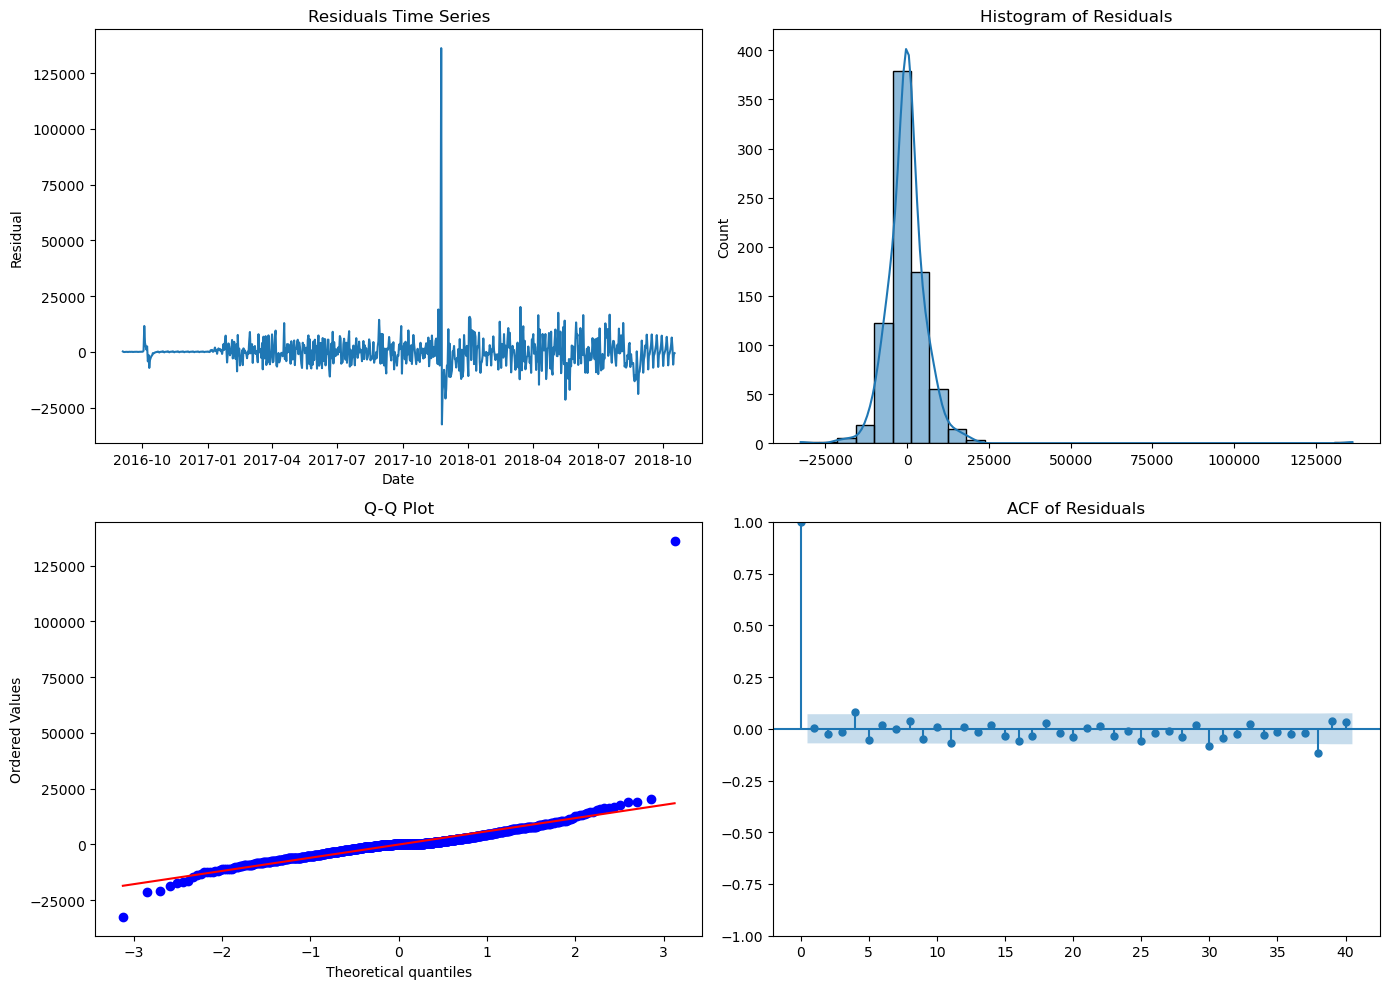

In [32]:
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
import scipy.stats as stats

# Get residuals from the SARIMA model
residuals = sarima_result.resid

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuals time series plot
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals Time Series')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Residual')

# Histogram of residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Residuals')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# ACF plot of residuals
plot_acf(residuals, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('ACF of Residuals')

plt.tight_layout()
plt.show()

## prompt:

I would like to conduct a Ljung-Box test to see if those residuals qualify as white noise


In [33]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on SARIMA residuals
# Common choices for lags are 10, 20, and 30
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)

print("Ljung-Box test results:")
print(ljung_box_result)

Ljung-Box test results:
      lb_stat  lb_pvalue
10  11.549079   0.316367
20  22.702682   0.303628
30  34.479749   0.262061


# Chat

**User**.  
You used 10, 20, 30 lags for the Ljung-Box test. What is the rationale behind the choice of a number of lags for this test?

**Assistant**.  
Great question! The choice of the number of lags for the Ljung-Box test is somewhat arbitrary, but there are several important considerations and common practices:

## General Guidelines:

1. **Sample Size Constraint**: The number of lags should be much smaller than your sample size. A common rule of thumb is to use no more than n/4 or √n lags, where n is the sample size.

2. **Seasonal Patterns**: If you suspect seasonality (like our weekly pattern with period=7), you should test lags that are multiples of the seasonal period. For daily data with weekly seasonality, testing lags 7, 14, 21, 28 would be appropriate.

3. **Model Order**: For ARIMA models, you might want to test lags beyond the order of your model to ensure no remaining autocorrelation.

## Why 10, 20, 30 Lags?

- **Lag 10**: Captures short-term dependencies and is a standard choice for daily data
- **Lag 20**: Covers about 3 weeks of daily data, good for detecting medium-term patterns
- **Lag 30**: Covers about a month, helps detect longer-term dependencies

## Alternative Approaches:

- **Rule of thumb**: Some practitioners use ln(n) lags where n is sample size
- **Seasonal-specific**: For our data, testing lags 7, 14, 21 would focus on weekly patterns
- **Multiple tests**: Testing several different lag lengths gives a more comprehensive view

## Interpretation:

- If p-value < 0.05 at any lag length: Reject null hypothesis (residuals are NOT white noise)
- If p-value > 0.05 at all lag lengths: Fail to reject null hypothesis (residuals resemble white noise)

The goal is to ensure our SARIMA model has captured all the systematic patterns in the data, leaving only random noise in the residuals.

## prompt:

There is an obvious outlier in the time series. Can you help me find the date when it happened?


In [35]:
# Find the date with the maximum daily payment value (the outlier)
outlier_date = daily_payments.idxmax()
outlier_value = daily_payments.max()
print(f"The largest outlier in the daily payment series occurred on {outlier_date.date()} with a value of {outlier_value:.2f}.")

The largest outlier in the daily payment series occurred on 2017-11-24 with a value of 179200.03.


# Chat

**User:**  

Is there any reason why 2017-11-24 should be an outlier for e-commerce data in Brazil?  

**Assistant:**  

Absolutely! November 24, 2017 was **Black Friday**, which explains why it's such a significant outlier in the Brazilian e-commerce data. Here's why:

## Black Friday in Brazil

**Date**: In 2017, Black Friday fell on November 24th (always the Friday after Thanksgiving in the US)

**Impact on Brazilian E-commerce:**
- Brazil has enthusiastically adopted Black Friday since around 2010
- It's become one of the biggest shopping events of the year in Brazil
- Online retailers offer massive discounts (often 30-70% off)
- Many consumers wait all year for Black Friday deals
- E-commerce platforms like Olist see enormous spikes in both order volume and payment values

## Why It's Such a Strong Outlier:

1. **Concentrated Shopping**: Unlike gradual increases, Black Friday creates an extreme one-day spike
2. **Higher Basket Values**: People buy more expensive items due to discounts
3. **Annual Event**: It only happens once per year, making it statistically unusual
4. **Marketing Hype**: Extensive advertising drives massive consumer participation
5. **E-commerce Focus**: Many deals are online-only, amplifying the effect on platforms like Olist

## Context in Brazilian Culture:

- Black Friday in Brazil often extends to "Black Week" or even "Black November"
- Brazilian consumers are very price-conscious and actively seek deals
- Social media amplifies awareness and participation
- Many retailers report 300-500% increases in sales volume on Black Friday

This outlier is actually a **positive business insight** - it shows the dataset captures real consumer behavior and major shopping events accurately!

## prompt:

What is the distribution of review scores across different product categories?

review_score                 1    2    3     4     5
product_category_name                               
agro_industria_e_comercio   27    7   13    57   108
alimentos                   51   13   26    92   313
alimentos_bebidas           17    5   29    50   178
artes                       31    7   18    39   112
artes_e_artesanato           3    0    3     3    15
...                        ...  ...  ...   ...   ...
sinalizacao_e_seguranca     20    3   29    33   112
tablets_impressao_imagem     5    6    6    21    43
telefonia                  580  181  460   974  2322
telefonia_fixa              50   17   19    56   120
utilidades_domesticas      837  249  594  1278  3985

[73 rows x 5 columns]


review_score                 1    2    3     4     5
product_category_name                               
agro_industria_e_comercio   27    7   13    57   108
alimentos                   51   13   26    92   313
alimentos_bebidas           17    5   29    50   178
artes                       31    7   18    39   112
artes_e_artesanato           3    0    3     3    15
...                        ...  ...  ...   ...   ...
sinalizacao_e_seguranca     20    3   29    33   112
tablets_impressao_imagem     5    6    6    21    43
telefonia                  580  181  460   974  2322
telefonia_fixa              50   17   19    56   120
utilidades_domesticas      837  249  594  1278  3985

[73 rows x 5 columns]


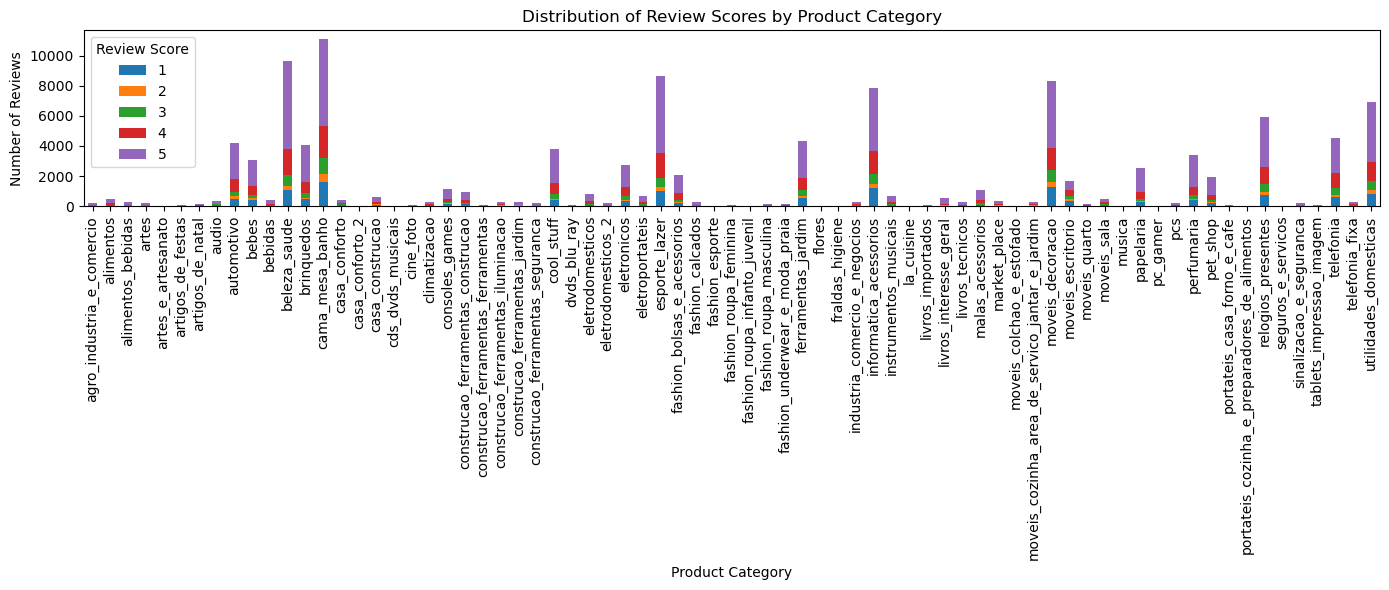

In [36]:
# Merge reviews_with_customer_full with order_items to get product_id for each review
reviews_with_product = reviews_with_customer_full.merge(order_items[['order_id', 'product_id']], on='order_id', how='left')

# Merge with products to get product_category_name
reviews_with_category = reviews_with_product.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

# Group by product_category_name and review_score, then count occurrences
review_score_dist = reviews_with_category.groupby(['product_category_name', 'review_score']).size().unstack(fill_value=0)

# Display the distribution
print(review_score_dist)

# Optional: Plot as stacked bar chart for visualization
import matplotlib.pyplot as plt

review_score_dist.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Distribution of Review Scores by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.tight_layout()
plt.show()

# prompt:

There are too many categories and the boxplots are too small to be informative. Can we group the categories into higher leve categories according to types of products?


In [ ]:
import seaborn as sns

# Define a mapping from detailed product categories to higher-level groups
category_group_map = {
    # Electronics
    'informatica_acessorios': 'Electronics',
    'telefonia': 'Electronics',
    'audio': 'Electronics',
    'pcs': 'Electronics',
    'tablets_impressao_imagem': 'Electronics',
    'consoles_games': 'Electronics',
    # Home & Furniture
    'moveis_decoracao': 'Home & Furniture',
    'cama_mesa_banho': 'Home & Furniture',
    'utilidades_domesticas': 'Home & Furniture',
    'moveis_escritorio': 'Home & Furniture',
    'moveis_cozinha_area_servico_jantar_e_jardim': 'Home & Furniture',
    # Fashion & Accessories
    'fashion_bolsas_e_acessorios': 'Fashion',
    'fashion_calcados': 'Fashion',
    'fashion_roupa_masculina': 'Fashion',
    'fashion_roupa_feminina': 'Fashion',
    'fashion_underwear_e_moda_praia': 'Fashion',
    'fashion_esporte': 'Fashion',
    # Sports & Leisure
    'esporte_lazer': 'Sports & Leisure',
    'artes': 'Sports & Leisure',
    'artes_e_artesanato': 'Sports & Leisure',
    # Health & Beauty
    'perfumaria': 'Health & Beauty',
    'beleza_saude': 'Health & Beauty',
    # Baby & Kids
    'bebes': 'Baby & Kids',
    'brinquedos': 'Baby & Kids',
    # Food & Drinks
    'alimentos': 'Food & Drinks',
    'alimentos_bebidas': 'Food & Drinks',
    'bebidas': 'Food & Drinks',
    # Books & Stationery
    'livros_tecnicos': 'Books & Stationery',
    'livros_interesse_geral': 'Books & Stationery',
    'papelaria': 'Books & Stationery',
    # Tools & Construction
    'construcao_ferramentas_construcao': 'Tools & Construction',
    'construcao_ferramentas_iluminacao': 'Tools & Construction',
    'construcao_ferramentas_jardim': 'Tools & Construction',
    'construcao_ferramentas_seguranca': 'Tools & Construction',
    'ferramentas_jardim': 'Tools & Construction',
    # Others
    # Add more mappings as needed...
}

# Assign higher-level category to each row
reviews_with_category['category_group'] = reviews_with_category['product_category_name'].map(category_group_map).fillna('Other')

# Plot boxplots of review scores by higher-level category
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='category_group', y='review_score', data=reviews_with_category, order=sorted(reviews_with_category['category_group'].unique()))
plt.title('Review Score Distribution by Product Category Group')
plt.xlabel('Product Category Group')
plt.ylabel('Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## prompt:

~~I think that there is a problem with the category mapping, because you are  only using English category names, while many of the categories have Portuguese names. Please use the product_category_name_translation.csv file to first translate all Portuguese category names to English and then repeat the analysis.~~


## prompt:

I would like to export the reviews_with_category_and_score dataset as an Excel file and store it in the data folder


# Install openpyxl for Excel file operations
!pip install openpyxl





print("Excel file exported successfully to 'data/reviews_with_category_and_score_Colab.xlsx'")reviews_with_category.to_excel('data/reviews_with_category_and_score_Colab.xlsx', index=False)# Export the reviews_with_category dataset as an Excel file in the data folder**User:**

Can you make a pdf report summarizing our findings about this dataset? I would like you to include the plots that illustrate some of those findings.